<a href="https://colab.research.google.com/github/chettkulkarni/MachineLearning/blob/master/Assignment_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wildfire Predictions

Dataset:- We have the historical dataset collected by american governement on all the wildfires in history of usa from 1900 to 2015.

Hypothesis:- Predicting Wildfire Damage Area based on several different features including
FIRE_YEAR, STAT_CAUSE_DESCR, LATITUDE, LONGITUDE, STATE, DISCOVERY_DATE

Task of this ntebook is to find if we can find effective clusters on the bases of datasets that we have.


In [0]:
#importing libraries required and also connecting to the sqlite3 db wildfire dataset.

import sqlite3
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D #
# conn = sqlite3.connect('../FPA_FOD_20170508.sqlite')

In [0]:
# conn
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#extracting meaningful columns
# df = pd.read_sql_query("SELECT FIRE_YEAR,SOURCE_REPORTING_UNIT,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,FIRE_SIZE,Shape,STAT_CAUSE_DESCR FROM 'Fires'", conn)
# df=pd.read_csv('/content/drive/My Drive/Machine Learning/fire.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link = 'https://drive.google.com/open?id=1ApRYxyMqnFKH8XW1GbQ-KZNJdbdeEdV9'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='


downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Fire.csv')

1ApRYxyMqnFKH8XW1GbQ-KZNJdbdeEdV9


In [3]:
df = pd.read_csv('Fire.csv')
df

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9,11,12,13,14,15,16,17,18,19,36,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_INCIDENT_NUMBER,ICS_209_NAME,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,511,Plumas National Forest,1,PNF-47,BJ8K,FOUNTAIN,NaN,NaN,NaN,NaN,NaN,2005,2453403.5,33,1300.0,9.0,Miscellaneous,2453403.5,33.0,1730.0,0.10,A,40.036944,-121.005833,5.0,USFS,CA,63,63.0,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,13,13,AAC0,PIGEON,NaN,NaN,NaN,NaN,NaN,2004,2453137.5,133,845.0,1.0,Lightning,2453137.5,133.0,1530.0,0.25,A,38.933056,-120.404444,5.0,USFS,CA,61,61.0,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,27,021,A32W,SLACK,NaN,NaN,NaN,NaN,NaN,2004,2453156.5,152,1921.0,5.0,Debris Burning,2453156.5,152.0,2024.0,0.10,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,17.0,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,43,6,NaN,DEER,NaN,NaN,NaN,NaN,NaN,2004,2453184.5,180,1600.0,1.0,Lightning,2453189.5,185.0,1400.0,0.10,A,38.559167,-119.913333,5.0,USFS,CA,3,3.0,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,44,7,NaN,STEVENOT,NaN,NaN,NaN,NaN,NaN,2004,2453184.5,180,1600.0,1.0,Lightning,2453189.5,185.0,1200.0,0.10,A,38.559167,-119.933056,5.0,USFS,CA,3,3.0,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880460,1880460,1880461,300348363,2015CAIRS29019636,NONFED,ST-CACDF,ST/C&L,USCASHU,Shasta-Trinity Unit,CASHU,Shasta-Trinity Unit,591814,009371,NaN,ODESSA 2,NaN,NaN,NaN,NaN,NaN,2015,2457291.5,269,1726.0,13.0,Missing/Undefined,2457291.5,269.0,1843.0,0.01,A,40.481637,-122.389375,13.0,STATE OR PRIVATE,CA,NaN,NaN,NaN,b'\x00\x01\xad\x10\x00\x00P\xb8\x1e\x85\xeb\x9...
1880461,1880461,1880462,300348373,2015CAIRS29217935,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,569419,000366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,2457300.5,278,126.0,9.0,Miscellaneous,NaN,NaN,NaN,0.20,A,37.617619,-120.938570,12.0,MUNICIPAL/LOCAL,CA,NaN,NaN,NaN,b'\x00\x01\xad\x10\x00\x00\x00\x80\xbe\x88\x11...
1880462,1880462,1880463,300348375,2015CAIRS28364460,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,574245,000158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,2457144.5,122,2052.0,13.0,Missing/Undefined,NaN,NaN,NaN,0.10,A,37.617619,-120.938570,12.0,MUNICIPAL/LOCAL,CA,NaN,NaN,NaN,b'\x00\x01\xad\x10\x00\x00\x00\x80\xbe\x88\x11...
1880463,1880463,1880464,300348377,2015CAIRS29218079,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,570462,000380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,2457309.5,287,2309.0,13.0,Missing/Undefined,NaN,NaN,NaN,2.00,B,37.672235,-120.898356,12.0,MUNICIPAL/LOCAL,CA,NaN,NaN,NaN,b'\x00\x01\xad\x10\x00\x00x\xba_\xaa~9^\xc0\xb...


In [4]:
df.columns

Index(['Unnamed: 0', 'OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE',
       'SOURCE_SYSTEM', 'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID',
       'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME',
       'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID', 'MTBS_FIRE_NAME',
       'COMPLEX_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
       'DISCOVERY_TIME', 'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'CONT_DATE',
       'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE',
       'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'COUNTY',
       'FIPS_CODE', 'FIPS_NAME', 'Shape'],
      dtype='object')

In [0]:
#finding pearson corelation in the dataset
pearsoncorr=df.corr()

The data in the dataset is hily un-corelated.

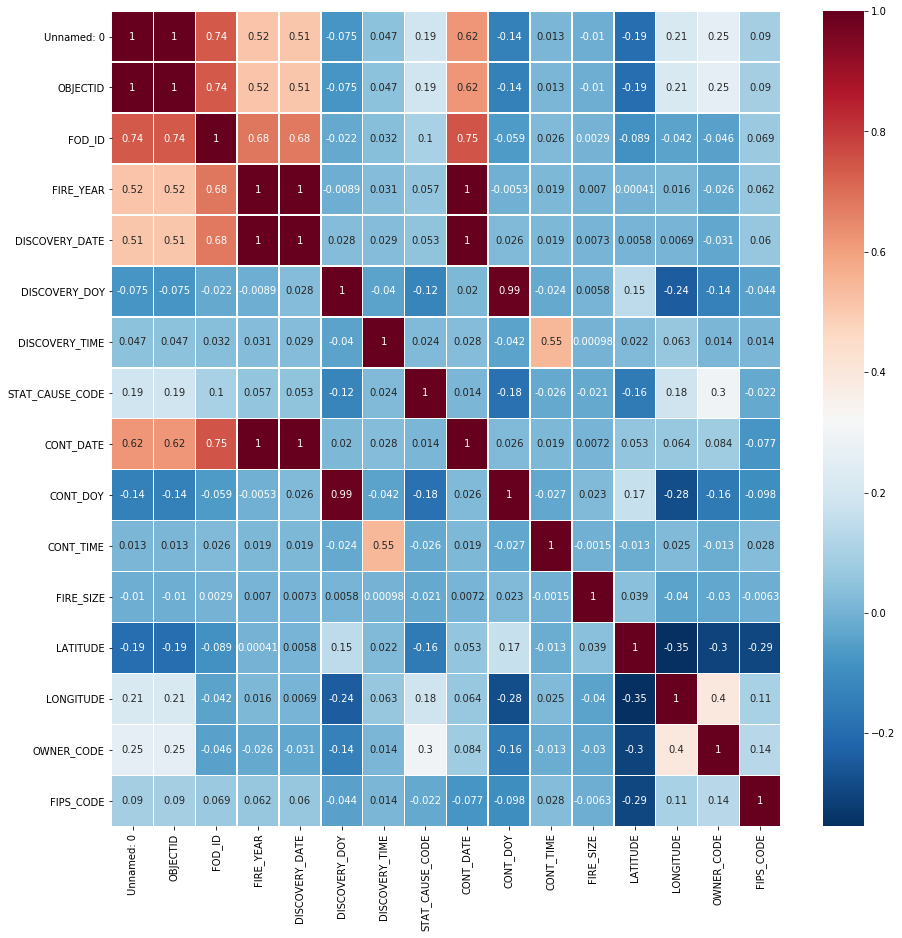

In [6]:

import seaborn as sb

plt.figure(1,figsize=(15,15))
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

# Kmeans on fire size vs Fire Cause

Even if the dataset doesnt have corelation wanted to explore if clusters can be formed on the bases of 

1)fire size and fire cause.

2)fire size and fire year

as our important feature at hand is fire size

In [0]:
le = preprocessing.LabelEncoder()

labelencoderlist=['STATE','STAT_CAUSE_DESCR']

In [0]:
le.fit(df.STATE)
df.STATE=le.transform(df.STATE)

le.fit(df.STAT_CAUSE_DESCR)
df.STAT_CAUSE_DESCR=le.transform(df.STAT_CAUSE_DESCR)
df=df.drop(['Shape'],axis=1)

In [0]:
df=df.dropna()
df2=df[['FIRE_SIZE','STAT_CAUSE_DESCR']]

In [0]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df2)
    Sum_of_squared_distances.append(km.inertia_)

Using elbow method to find the optimal k for performing k means clustering

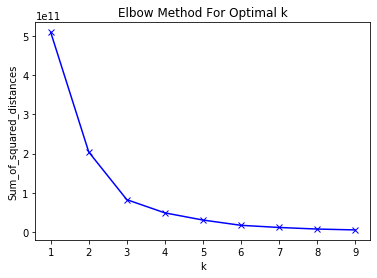

In [11]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

optimal k is 3

In [12]:
df3 = df[['FIRE_SIZE','STAT_CAUSE_DESCR']]
kmeans = KMeans(n_clusters=3)
y = kmeans.fit_predict(df2)
print(df3.head())

      FIRE_SIZE  STAT_CAUSE_DESCR
188     16100.0                 6
1505    11936.0                 6
1970     3025.0                 6
3159     2643.0                 6
3402     2398.0                 6


In [13]:
kmeans.cluster_centers_

array([[6.92237283e+03, 5.93333333e+00],
       [7.38477792e+04, 5.86486486e+00],
       [3.17322000e+05, 6.33333333e+00]])

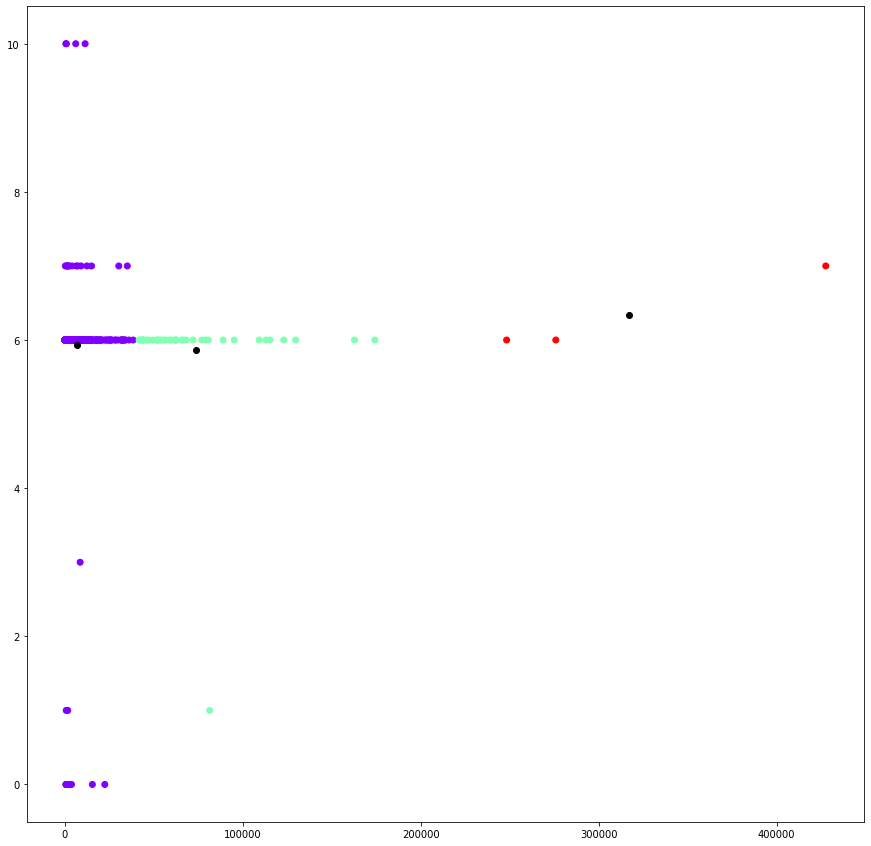

In [14]:
plt.figure(1,figsize=(15,15))
plt.scatter(df3.FIRE_SIZE, df3.STAT_CAUSE_DESCR, c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')

As observed above, no meaning ful clusters were formed on the bases of fire size vs fire cause

Also performing same steps for fire size vs state,and again no meaningful clusters are formed

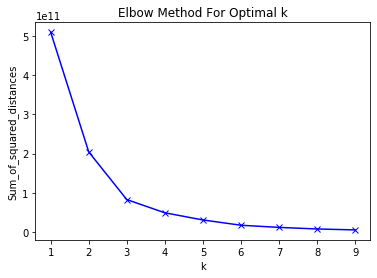

In [15]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df2)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [16]:
df3 = df[['FIRE_SIZE','FIRE_YEAR']]
kmeans = KMeans(n_clusters=3)
y = kmeans.fit_predict(df2)
print(df3.head())

      FIRE_SIZE  FIRE_YEAR
188     16100.0       2005
1505    11936.0       2005
1970     3025.0       2005
3159     2643.0       2005
3402     2398.0       2005


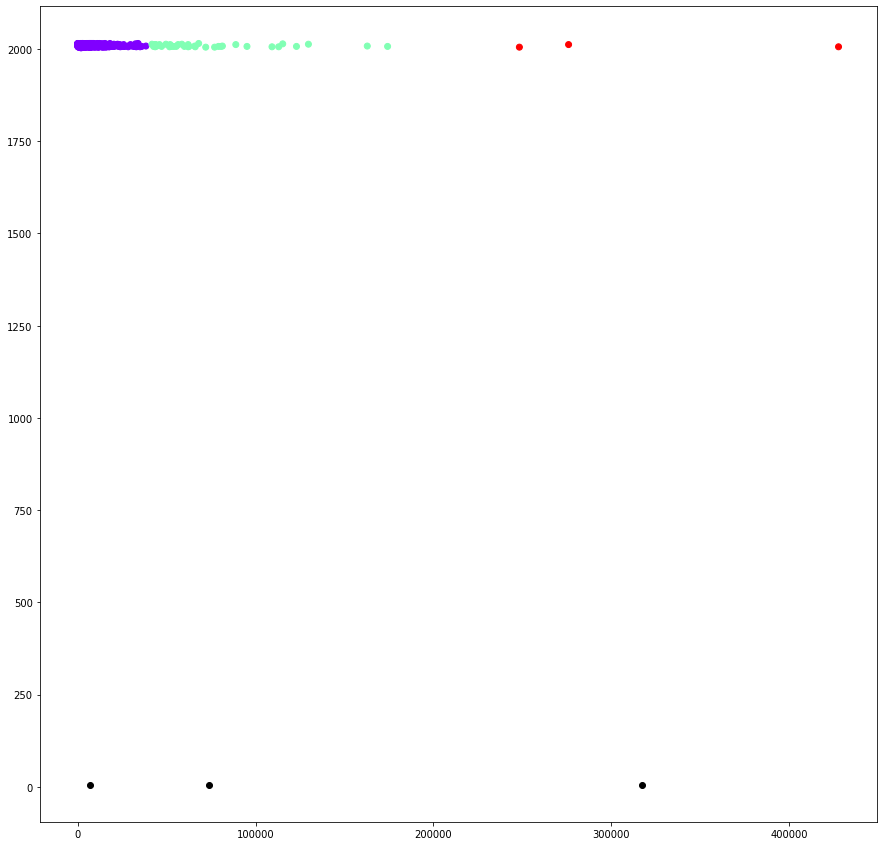

In [17]:
plt.figure(1,figsize=(15,15))
plt.scatter(df3.FIRE_SIZE, df3.FIRE_YEAR, c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')

# Agglomerative Clustering
Tried aggloemerative clustering and it did not execute becasue data set is huge (900 mb)

In [0]:
# from sklearn.cluster import AgglomerativeClustering 

In [0]:
# ac2 = AgglomerativeClustering(n_clusters = 2) 

In [0]:
# plt.figure(figsize =(6, 6)) 
# plt.scatter(df2.FIRE_SIZE, df2.FIRE_YEAR,  
#            c = ac2.fit_predict(df2), cmap ='rainbow') 
# plt.show() 

# Using TensorFlow KMeans

Tried applying Kmeans Clustering from Kmeans Tensorflow documentation.
Found two clusters using TensorFlow

In [21]:
import numpy as np
import tensorflow as tf

num_points = 100
dimensions = 2
# points = np.random.uniform(0, 1000, [num_points, dimensions])
points=df[['FIRE_SIZE','STAT_CAUSE_DESCR']]
def input_fn():
    return tf.compat.v1.train.limit_epochs(
      tf.convert_to_tensor(points, dtype=tf.float32), num_epochs=1)

num_clusters = 4
kmeans = tf.compat.v1.estimator.experimental.KMeans(
    num_clusters=num_clusters, use_mini_batch=False)

# train
num_iterations = 10
previous_centers = None
for _ in range(num_iterations):
    kmeans.train(input_fn)
    cluster_centers = kmeans.cluster_centers()
    if previous_centers is not None:
        print('delta:', cluster_centers - previous_centers)
    previous_centers = cluster_centers
    print('score:', kmeans.score(input_fn))
print('cluster centers:', cluster_centers)

# map the input points to their clusters
cluster_indices = list(kmeans.predict_cluster_index(input_fn))
for i, point in enumerate(points):
    cluster_index = cluster_indices[i]
    center = cluster_centers[cluster_index]
    print('point:', point, 'is in cluster', cluster_index, 'centered at', center)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpi6rp7ko4', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fb70d20b320>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
Use Variable.read_value. Vari

Trying to Have a triangulated Kmeans Calculation based on 3 features and newly calculated feature set called State, FireSize and Fire Year to find if they are in any way corelated 

In [0]:
new_df=df.groupby(by=['STATE','FIRE_YEAR'],axis=0)['FIRE_SIZE'].mean().reset_index()

In [23]:
new_df

,STATE,FIRE_YEAR,FIRE_SIZE
0,3,2005,68145.000000
1,3,2006,5702.500000
2,3,2009,5217.357143
3,3,2010,2714.800000
4,3,2012,2011.800000
...,...,...,...
66,48,2012,8985.842500
67,48,2014,5678.450000
68,50,2012,755.000000
69,51,2005,3025.000000


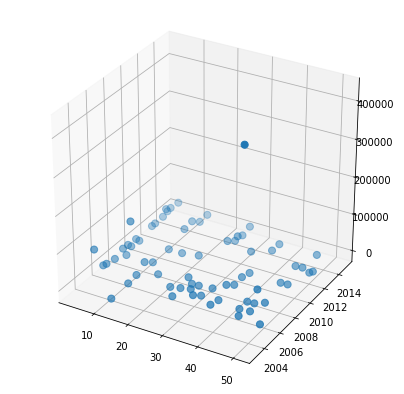

In [24]:
X=new_df
k_means = KMeans(n_clusters=3)
k_means.fit(X)
k_means_predicted = k_means.predict(X)
centroids = k_means.cluster_centers_
colors = ['navy', 'turquoise', 'darkorange']
plt.figure('K-Means on Iris Dataset', figsize=(7,7))
ax = plt.axes(projection = '3d')
ax.scatter(X.STATE,X.FIRE_YEAR,X.FIRE_SIZE , cmap='Set2', s=50)